# Diabetes 130 raw

In [1]:
import zipfile
import pandas as pd
import numpy as np
import ehrapy as ep
import ehrdata as ed
from anndata import AnnData
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip

Nothing to do - goodbye


In [4]:
with zipfile.ZipFile("dataset_diabetes.zip", "r") as zip_ref:
    zip_ref.extractall("data")

# Data Wrangling

In [5]:
data = pd.read_csv(
    "data/dataset_diabetes/diabetic_data.csv",
    sep=",",
    index_col="encounter_id",
    na_values="?",
)

In [6]:
data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
data.describe(include="all")

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,61510,51817,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101745,101408,100343,101766.000000,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,5,3,10,9,NaN,NaN,NaN,NaN,17,72,NaN,NaN,NaN,NaN,NaN,NaN,716,748,789,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,MC,InternalMedicine,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,32439,14635,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [9]:
data.shape

(101766, 49)

## ehrapy sanity check

In [10]:
column_obs_only = [
    "patient_nbr",
    # "age_mean",
    # "weight_mean",
    # "race", "gender",
    "age",
    # "weight",
    "payer_code",
    # "admission_type_id", "discharge_disposition_id", "admission_source_id",
    # "medical_specialty", "readmitted", "diag_1", "diag_2", "diag_3",
    # "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
    # "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone",
    # "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
    # "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
    # "metformin-rosiglitazone", "metformin-pioglitazone",
    # "max_glu_serum", "A1Cresult",
    #'change_of_meds', 'diabetesMed',
]

In [11]:
adata = ep.io.read_csv(
    "data/dataset_diabetes/diabetic_data.csv",
    columns_obs_only=column_obs_only,
    index_column="encounter_id",
)
edata = ed.EHRData.from_adata(adata=adata)


In [12]:
edata

EHRData object with n_obs × n_vars = 101766 × 46
    obs: 'patient_nbr', 'age', 'payer_code'
    layers: 'original'
    shape of .X: (101766, 46)

In [13]:
edata = ep.pp.encode(edata, autodetect=True)

! Features 'admission_type_id', 'time_in_hospital', 'num_procedures', 'number_diagnoses' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


Output()

In [14]:
edata.var_names

Index(['ehrapycat_race_?', 'ehrapycat_race_AfricanAmerican',
       'ehrapycat_race_Asian', 'ehrapycat_race_Caucasian',
       'ehrapycat_race_Hispanic', 'ehrapycat_race_Other',
       'ehrapycat_gender_Female', 'ehrapycat_gender_Male',
       'ehrapycat_gender_Unknown/Invalid', 'ehrapycat_weight_>200',
       ...
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object', length=2445)

In [15]:
ep.pp.knn_impute(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

Output()

KeyboardInterrupt: 

In [ ]:
ep.ad.feature_type_overview(edata)

Variable names for AnnData object with 101766 obs and 2445 vars
╠══ 🔐 Encoded variables
║   ╠══ race -> 6 categories; one-hot encoded; original data type: string
║   ╠══ gender -> 3 categories; one-hot encoded; original data type: string
║   ╠══ weight -> 10 categories; one-hot encoded; original data type: string
║   ╠══ medical_specialty -> 73 categories; one-hot encoded; original data type: string
║   ╠══ diag_1 -> 717 categories; one-hot encoded; original data type: string
║   ╠══ diag_2 -> 749 categories; one-hot encoded; original data type: string
║   ╠══ diag_3 -> 790 categories; one-hot encoded; original data type: string
║   ╠══ max_glu_serum -> 4 categories; one-hot encoded; original data type: string
║   ╠══ A1Cresult -> 4 categories; one-hot encoded; original data type: string
║   ╠══ metformin -> 4 categories; one-hot encoded; original data type: string
║   ╠══ repaglinide -> 4 categories; one-hot encoded; original data type: string
║   ╠══ nateglinide -> 4 categories; one-hot encoded; original data type: string
║   ╠══ chlorpropamide -> 4 categories; one-hot encoded; original data type: string
║   ╠══ glimepiride -> 4 categories; one-hot encoded; original data type: string
║   ╠══ acetohexamide -> 2 categories; one-hot encoded; original data type: string
║   ╠══ glipizide -> 4 categories; one-hot encoded; original data type: string
║   ╠══ glyburide -> 4 categories; one-hot encoded; original data type: string
║   ╠══ tolbutamide -> 2 categories; one-hot encoded; original data type: string
║   ╠══ pioglitazone -> 4 categories; one-hot encoded; original data type: string
║   ╠══ rosiglitazone -> 4 categories; one-hot encoded; original data type: string
║   ╠══ acarbose -> 4 categories; one-hot encoded; original data type: string
║   ╠══ miglitol -> 4 categories; one-hot encoded; original data type: string
║   ╠══ troglitazone -> 2 categories; one-hot encoded; original data type: string
║   ╠══ tolazamide -> 3 categories; one-hot encoded; original data type: string
║   ╠══ examide -> 1 categories; one-hot encoded; original data type: string
║   ╠══ citoglipton -> 1 categories; one-hot encoded; original data type: string
║   ╠══ insulin -> 4 categories; one-hot encoded; original data type: string
║   ╠══ glyburide-metformin -> 4 categories; one-hot encoded; original data type: string
║   ╠══ glipizide-metformin -> 2 categories; one-hot encoded; original data type: string
║   ╠══ glimepiride-pioglitazone -> 2 categories; one-hot encoded; original data type: string
║   ╠══ metformin-rosiglitazone -> 2 categories; one-hot encoded; original data type: string
║   ╠══ metformin-pioglitazone -> 2 categories; one-hot encoded; original data type: string
║   ╠══ change -> 2 categories; one-hot encoded; original data type: string
║   ╠══ diabetesMed -> 2 categories; one-hot encoded; original data type: string
║   ╚══ readmitted -> 3 categories; one-hot encoded; original data type: string
╚══ 🔓 Unencoded variables
    ╠══ admission_type_id -> data type: floating
    ╠══ discharge_disposition_id -> data type: floating
    ╠══ admission_source_id -> data type: floating
    ╠══ time_in_hospital -> data type: floating
    ╠══ num_lab_procedures -> data type: floating
    ╠══ num_procedures -> data type: floating
    ╠══ num_medications -> data type: floating
    ╠══ number_outpatient -> data type: floating
    ╠══ number_emergency -> data type: floating
    ╠══ number_inpatient -> data type: floating
    ╚══ number_diagnoses -> data type: floating

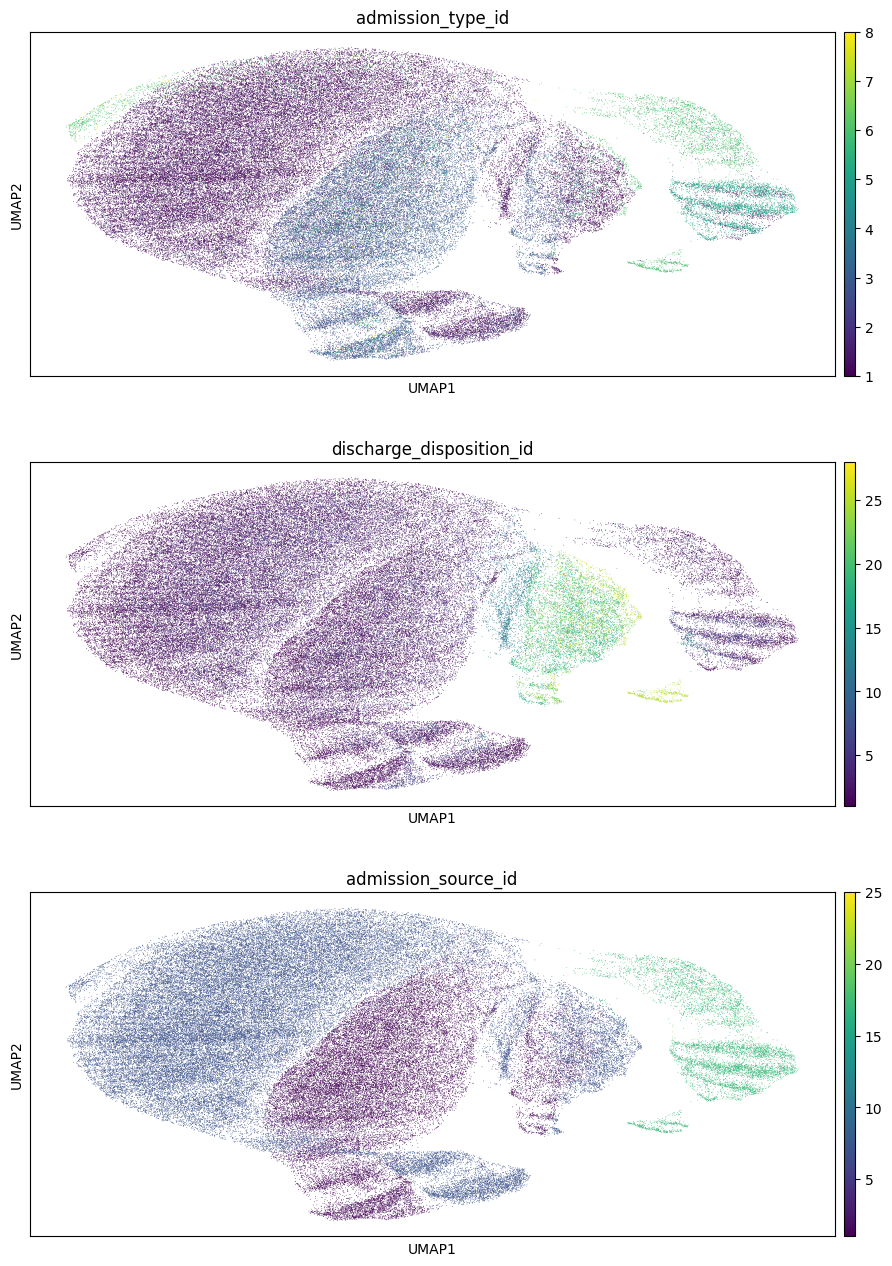

In [ ]:
ep.pl.umap(
    edata,
    color=[
        "admission_type_id",
        "discharge_disposition_id",
        "admission_source_id",
    ],
    ncols=1,
    wspace=0.75,
)